In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.

In [2]:
all_data = pd.read_csv('complete_dataset/combined_sentiment_analysis.csv')

In [3]:
all_data.shape

(14330, 8)

In [4]:
all_data.head(5)

,comment_body,comment_score,sentiment,neg,neu,pos,compound,subreddit
0,I can't wait for him to file evidence that she...,1608,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,politics
1,"""Here is a receipt labeled 'Bribe for Judge Ca...",1316,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",0.196,0.804,0.000,-0.4423,politics
2,I think the Supreme Court ruled that is just f...,578,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.000,0.597,0.403,0.6597,politics
3,"Hey Cannon, remember Ricky Shiffer the derange...",513,"{'neg': 0.196, 'neu': 0.763, 'pos': 0.041, 'co...",0.196,0.763,0.041,-0.7968,politics
4,Cannon has no clue what she's getting into. Wh...,494,"{'neg': 0.038, 'neu': 0.741, 'pos': 0.221, 'co...",0.038,0.741,0.221,0.8248,politics


In [5]:
#data is relatively balanced
all_data.subreddit.value_counts(normalize=True)

subreddit
worldnews    0.542359
politics     0.457641
Name: proportion, dtype: float64

In [6]:
all_data.isna().sum()

comment_body     0
comment_score    0
sentiment        0
neg              0
neu              0
pos              0
compound         0
subreddit        0
dtype: int64

<Axes: >

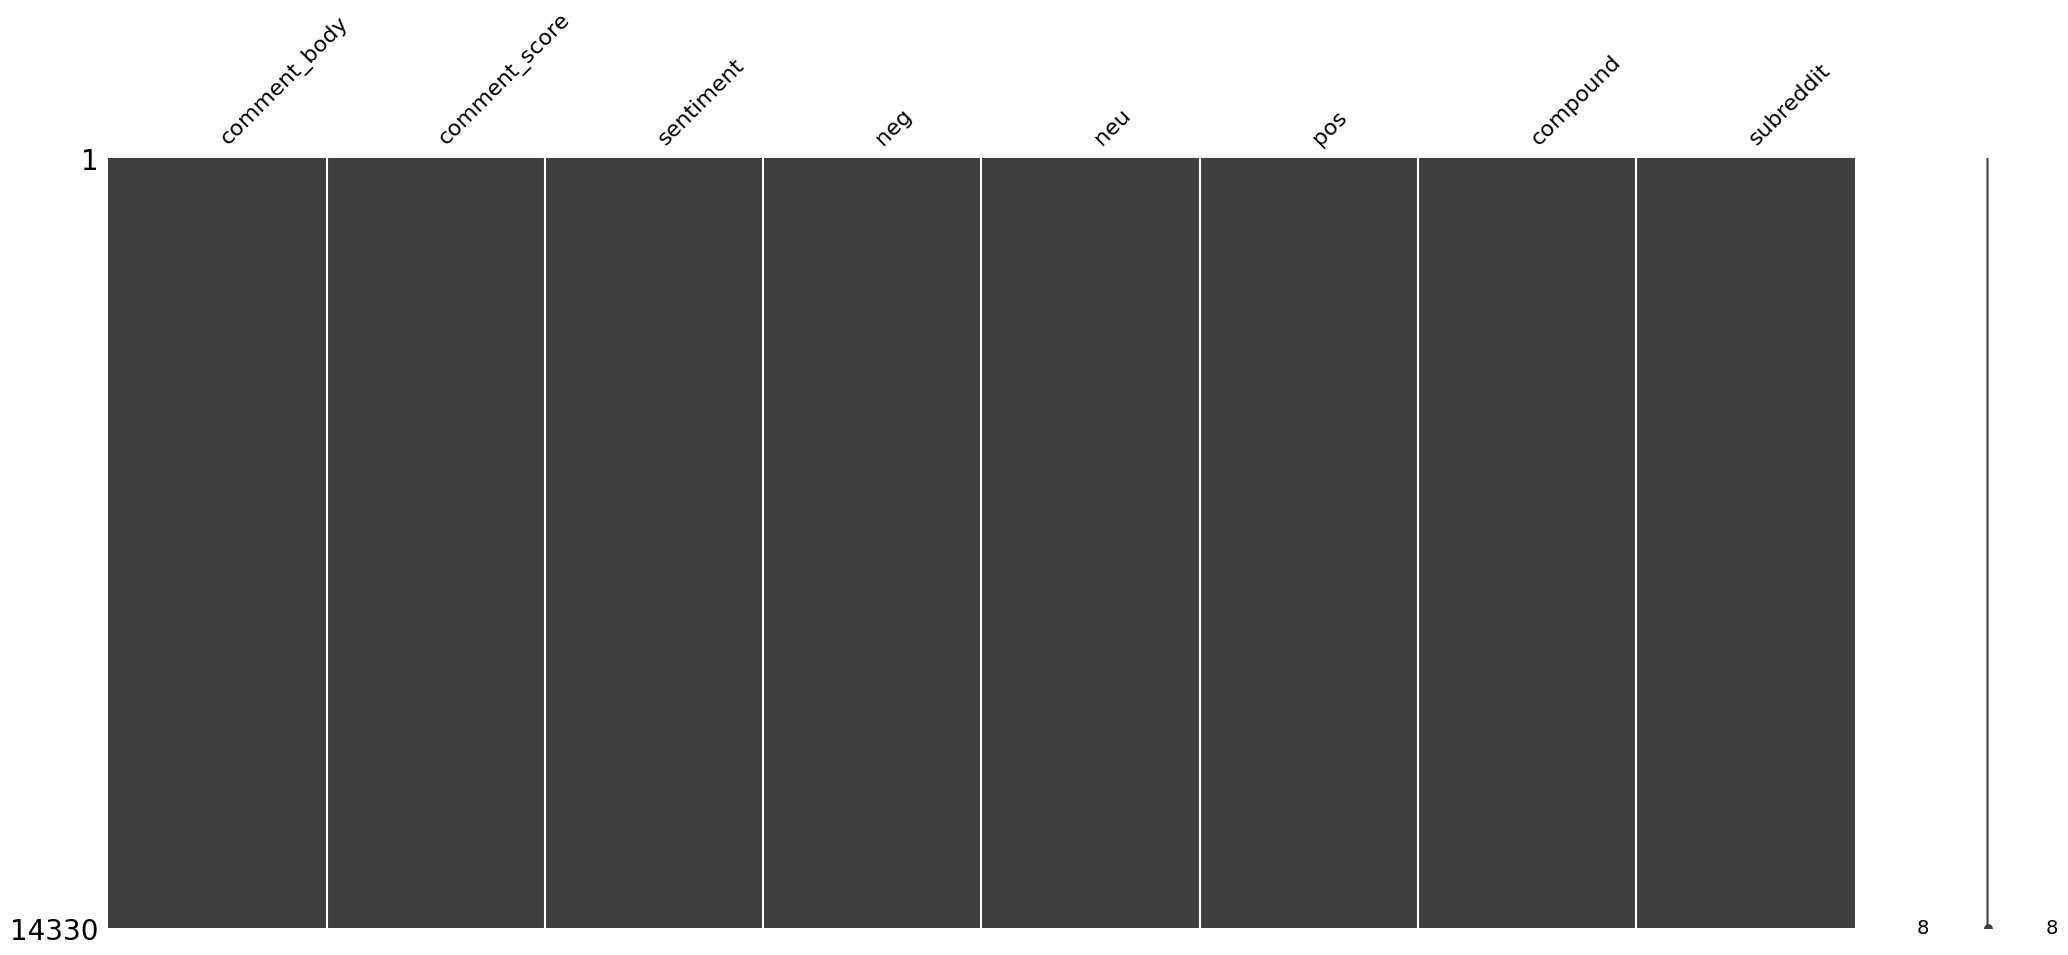

In [7]:
msno.matrix(all_data)

In [8]:
# first with logistic regression on sentiment scores
X = all_data[['neg', 'neu', 'pos', 'compound']]
#mapping the subreddit values to 0 and 1
y = all_data['subreddit'].map({'politics': 0, 'worldnews': 1}).values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
X_train.shape

(10747, 4)

In [11]:
X_test.shape

(3583, 4)

In [12]:
logr = LogisticRegression(max_iter=1000)

In [13]:
logr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = logr.predict(X_test)

In [16]:
logr.score(X_train, y_train)

0.5466641853540523

In [17]:
logr.score(X_test, y_test)

0.5512140664247837

In [18]:
y_pred = logr.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)

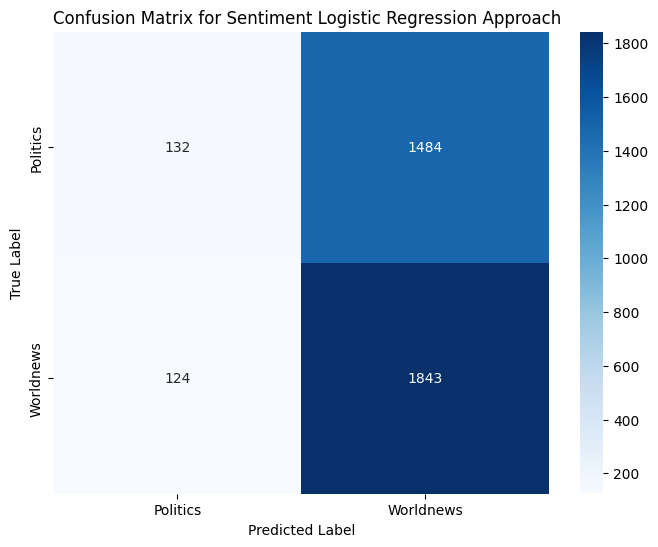

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Politics', 'Worldnews'], yticklabels=['Politics', 'Worldnews'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Sentiment Logistic Regression Approach', loc='left')
plt.show()

# Doing a TDF-IF on the comments instead of using raw sentiment analysis

In [21]:
all_data = pd.read_csv('complete_dataset/combined_sentiment_analysis.csv')
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = vectorizer.fit_transform(all_data['comment_body'])

NameError: name 'TfidfVectorizer' is not defined

In [ ]:
X_sentiment = all_data[['neg', 'neu', 'pos', 'compound']]

In [22]:
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())

NameError: name 'X_text' is not defined

In [365]:
# making X_text commensurate with X_sentiment and concatenating them
X = pd.concat([pd.DataFrame(X_text.toarray()), pd.DataFrame(X_sentiment)], axis=1)
X.columns = X.columns.astype(str)

In [366]:
y = all_data['subreddit'].map({'politics': 0, 'worldnews': 1}).values

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [368]:
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [369]:
logr.score(X_train, y_train)

0.8354889736670699

In [370]:
logr.score(X_test, y_test)

0.7884454367848172

In [371]:
y_pred = logr.predict(X_test)

In [372]:
cm = confusion_matrix(y_test, y_pred)

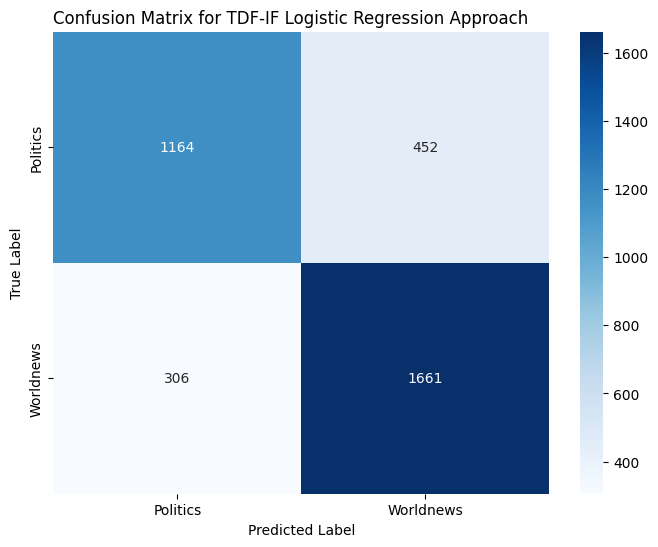

In [373]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Politics', 'Worldnews'], yticklabels=['Politics', 'Worldnews'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for TDF-IF Logistic Regression Approach', loc='left')
plt.show()

# Trying an SVM approach

In [374]:
all_data = pd.read_csv('complete_dataset/combined_sentiment_analysis.csv')
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = vectorizer.fit_transform(all_data['comment_body'])

In [375]:
X_sentiment = all_data[['neg', 'neu', 'pos', 'compound']]

In [376]:
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())

In [377]:
X = pd.concat([pd.DataFrame(X_text.toarray()), pd.DataFrame(X_sentiment)], axis=1)
X.columns = X.columns.astype(str)

In [378]:
y = all_data['subreddit'].map({'politics': 0, 'worldnews': 1}).values

In [379]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [380]:
svm.score(X_train, y_train)

0.8937377872894762

In [381]:
svm.score(X_test, y_test)

0.7862126709461346

In [382]:
y_pred = svm.predict(X_test)

In [383]:
cm = confusion_matrix(y_test, y_pred)

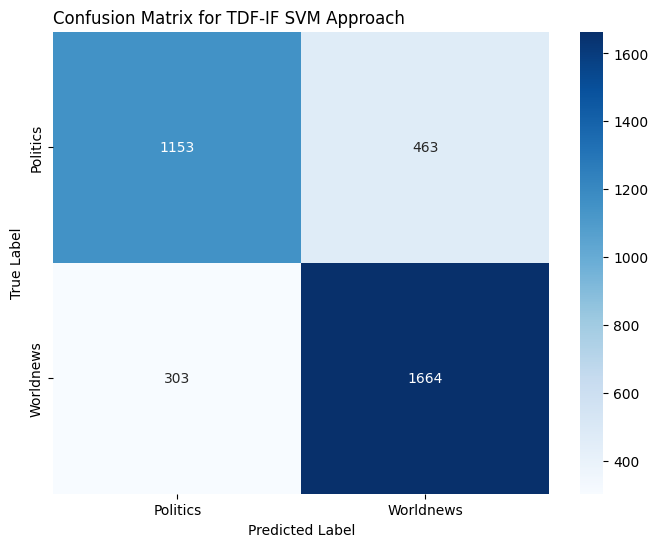

In [384]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Politics', 'Worldnews'], yticklabels=['Politics', 'Worldnews'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for TDF-IF SVM Approach', loc='left')
plt.show()

# Setting up a pipeline to see if I can reduce overfitting

In [385]:
all_data = pd.read_csv('complete_dataset/combined_sentiment_analysis.csv')
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = vectorizer.fit_transform(all_data['comment_body'])

In [386]:
sid = SentimentIntensityAnalyzer()

In [387]:
def analyze_sentiment(comment):
    if isinstance(comment, str):
        return sid.polarity_scores(comment)
    else:
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

In [388]:
all_data['sentiment'] = all_data['comment_body'].apply(analyze_sentiment)

In [389]:
sentiment_df = all_data['sentiment'].apply(pd.Series)

In [390]:
sentiment_df.columns = sentiment_df.columns.astype(str)

In [391]:
# I used ChatGPT to help me with constructing this class object to do sentiment analysis inside the pipeline. It took many iterations to get this right
class SentimentExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Apply sentiment analysis
        sentiment_scores = X.apply(lambda comment: sid.polarity_scores(comment) if isinstance(comment, str) else {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0})
        return pd.DataFrame(sentiment_scores.tolist())

In [392]:
pipe = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000)),
        ('sentiment', SentimentExtractor())
    ])),
    ('scaler', StandardScaler(with_mean=False)),
    ('svm', SVC())
])

In [393]:
pgrid = {
    'features__tfidf__max_features': [500, 1000, 1500],
    'svm__C': [0.1, 1, 10],
}

In [394]:
gs = GridSearchCV(pipe, pgrid, cv=5, n_jobs=4, verbose=1)


In [395]:
gs.fit(all_data['comment_body'], all_data['subreddit'].map({'politics': 0, 'worldnews': 1}).values)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('tfidf',
                                                                        TfidfVectorizer(max_features=1000,
                                                                                        stop_words='english')),
                                                                       ('sentiment',
                                                                        SentimentExtractor())])),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('svm', SVC())]),
             n_jobs=4,
             param_grid={'features__tfidf__max_features': [500, 1000, 1500],
                         'svm__C': [0.1, 1, 10]},
             verbose=1)